# Histogram of Probabilities 


In [1]:
from qiskit import QuantumCircuit, BasicAer, execute, IBMQ
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
# To call a real backend, we use 'provider' object instead of BasicAer
provider = IBMQ.load_account()

<font color='red'> add um ciruito mais legal que esse </font> 


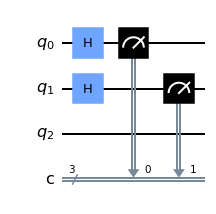

In [2]:
qc_hist = QuantumCircuit(3,3)
qc_hist.h(0)
qc_hist.h(1)

qc_hist.measure([0,1],[0,1])
# also possible to measure only one qubit with the desired classical bit.
#For example, qubit 2 with classical bit 1: qc.measure(1,0) 

qc_hist.draw('mpl')

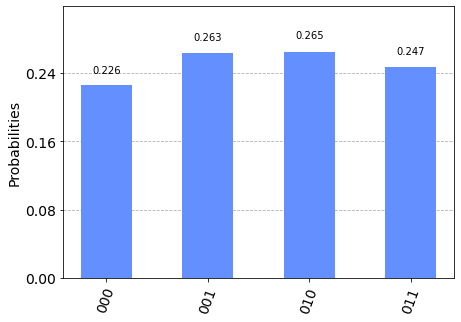

In [3]:
#runing the circuit with qasm_simulator

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc_hist, backend).result() #shots=1024 is by default defined
counts = result.get_counts()
plot_histogram(counts)

We can add some features to the histogram 


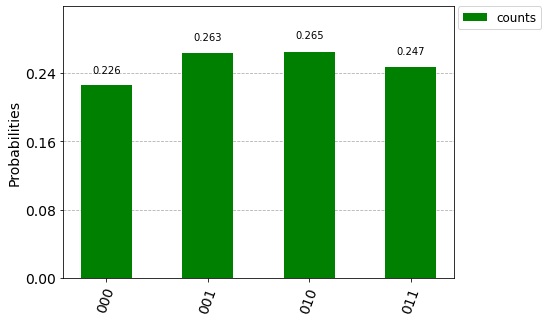

In [4]:
leg = ['counts']
plot_histogram(counts, legend=leg, sort='asc',color='green') 

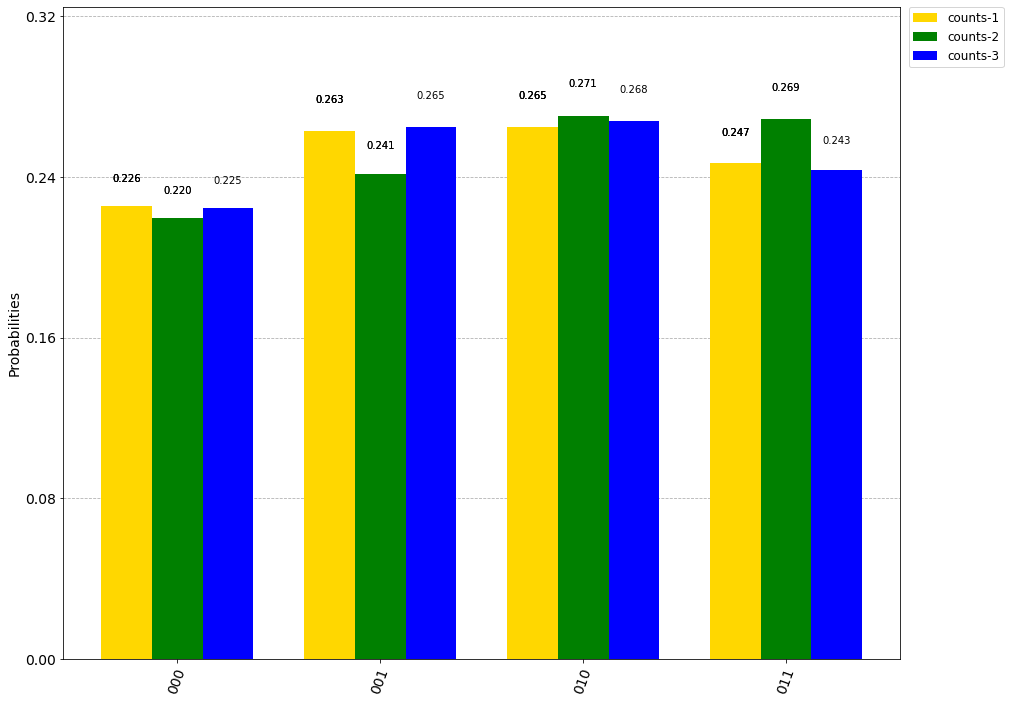

In [5]:
# for more counts, we have

job2 = execute(qc_hist, backend, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()

job3 = execute(qc_hist, backend, shots=1024)
result3 = job3.result()
counts3 = result3.get_counts()

#brazilian flag :D 
leg = ['counts-1','counts-2', 'counts-3']
plot_histogram([counts,counts2,counts3], legend=leg, sort='asc', figsize = (15,12), color=['gold','green','blue']) 

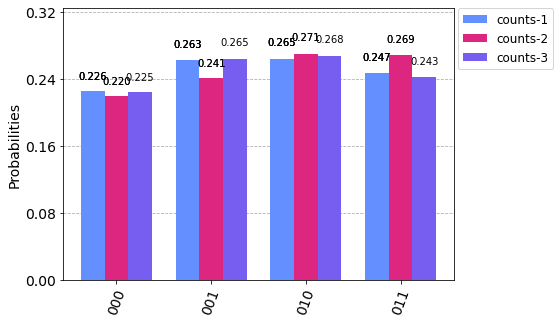

In [6]:
#default colors and size
plot_histogram([counts,counts2,counts3], legend=leg, sort='asc') 

# Specifing a coupling

In [7]:
qc_spec = QuantumCircuit(3)
qc_spec.measure_all()

backend = BasicAer.get_backend('qasm_simulator')
#specify some linear connection
couple_map = [[0,1],[1,2]]

job = execute(qc_spec,backend, shots= 1024, coupling_map = couple_map)
results = job.result()
counts = result.get_counts()

print(counts)

{'011': 253, '001': 269, '010': 271, '000': 231}


# Real backend by provider


In [8]:
import qiskit.tools.jupyter
from qiskit.tools import job_monitor

#this creates a pop up of your jobs, check it out by running!
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
%qiskit_backend_overview

In [10]:

belem = provider.get_backend('ibmq_belem') 
#Note: you can check which backends are available for you too!
job = execute(qc_hist, belem)

#job status
job_monitor(job)

Job Status: job has successfully run


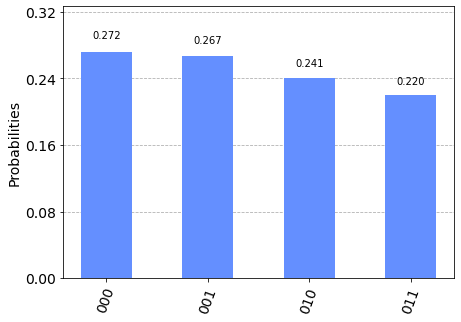

In [11]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)